# Métallisation de plastiques par colloïdes à base de palladium

La métallisation de plastique peut-être réalisée de façon industrielle après adhésion sur le plastique de colloïdes à base de palladium (procédé FUTURON ). Cette étude consiste à étudier la stabilité des particules en suspension puis estimer la faculté à l’adhésion de ces particules sur une plaque de plastique. 



In [2]:
import numpy as np
import matplotlib.pyplot as plt

#CONSTANTES

#Nombre d'Avogadro
avo=6.02214076e23

#Constante de Boltzmann
k=1.38064852e-23 #m2 kg s-2 K-1 ou J/K
T=298.13
kT=k*T #énergie thermique par molécule
RGP=k*avo

#Charge de l'électron
e=1.602e-19
F=e*avo

#Permittivité électrique de l'eau
eps=8.85418782e-12*78.5 #m-3 kg-1 s4 A2

#Viscosité (dynamique) de l'eau à 20°C
mu=1e-3 #Pa.s

$$Log_{10}(W)=-2.06 10^{+9} \frac{a\Upsilon^2}{z^2}Log_{10}c+b$$

Si la ccc est connu on peut déterminer b (puisque la ccc correspond à une stabilité de 1) :

$$b=2.06 10^{+9} \frac{a\Upsilon^2}{z^2}Log_{10}ccc$$



3)	Calculer la valeur du paramètre b 

In [10]:
zeta_c=-0.05 #V
z=1
a=3e-9
ccc=0.1
upsilon=np.tanh(z*e*zeta_c/(4*kT))
pente=-2.06e+9*a*upsilon**2/(z**2)
b=np.log10(ccc)*(-pente)
print (pente)
print ('b=',b)



-1.2594435785440277
b= -1.2594435785440277


I=0.05 M V/kT @h=1 nm 0.8946742225630204
I=0.05 M Vmax/kT  0.9250214120196755
I=0.01 M V/kT @h=1 nm 1.9520060102267032
I=0.01 M Vmax/kT  1.960037850535986


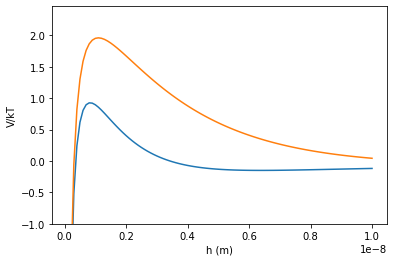

In [27]:
zeta_p=-0.015
upsilon1=np.tanh(z*e*zeta_c/(4*kT))
upsilon2=np.tanh(z*e*zeta_p/(4*kT))

Hamaker=1e-20
Ld=np.sqrt(eps*RGP*T/(2*F*F*I*1000))
def V(h):
    V=4*np.pi*a*eps*((4*RGP*T/(F))**2)*upsilon1*upsilon2*np.exp(-h/Ld)-Hamaker*a/(6*h)
    return V
h=np.linspace(1e-10,1e-8,100)

I=0.05
Ld=np.sqrt(eps*RGP*T/(2*F*F*I*1000))
plt.plot(h,V(h)/kT)
print ('I=0.05 M V/kT @h=1 nm', V(1e-9)/kT )
print ('I=0.05 M Vmax/kT ', max(V(h)/kT))
I=0.01
Ld=np.sqrt(eps*RGP*T/(2*F*F*I*1000))
plt.plot(h,V(h)/kT)
print ('I=0.01 M V/kT @h=1 nm', V(1e-9)/kT )
print ('I=0.01 M Vmax/kT ', max(V(h)/kT))
plt.ylim(-1,)
plt.xlabel('h (m)')
plt.ylabel('V/kT')
plt.show()